In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#data cleaning
#https://www.kaggle.com/paramaggarwal/fashion-product-images-small

def df_drop(styles, col, item):
    """
    This function drops certain columns
    input: styles, dataframe
        col, the item we want to drop in this coloumn
        item, which item we want to drop 
    """
    for i in item:
        styles = styles.drop(styles[styles[col] == i].index)
    return styles

def get_df():
    """
    this function get and clean the data, return a dataframe
    """


    styles = pd.read_csv("D:\Project\PAHIRAN\DATASET\styles.csv", on_bad_lines="skip")
    styles = styles.drop(["productDisplayName"],axis = 1) #drop useless column, we do not need name to do recommendation
    styles = styles.drop(["year"],axis = 1) #drop useless column, we do not need year to do recommendation
    styles = styles[(styles.masterCategory=='Apparel')| (styles.masterCategory=='Footwear')] # drop useless rows, we are not recommend acessories
    styles = styles.drop(styles[styles["subCategory"] == "Innerwear"].index) # drop useless row, we are not recommend innerwears, only outfits.
    styles = styles.dropna() # drop NA
    styles = df_drop(styles,"subCategory", ["Apparel Set", "Dress","Loungewear and Nightwear","Saree","Socks"]) # we only recommend outfits.
    styles["subCategory"] = styles["subCategory"].transform(lambda x: "Footwear" if(x in ["Shoes","Flip Flops","Sandal"]) else x) # Group them into one category.
    styles = styles.drop(labels=[6695,16194,32309,36381,40000], axis=0) # drop incomplete rows
    return styles


styles = get_df()
styles

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual
...,...,...,...,...,...,...,...,...
44417,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,Casual
44418,42234,Women,Apparel,Topwear,Tops,Blue,Summer,Casual
44419,17036,Men,Footwear,Footwear,Casual Shoes,White,Summer,Casual
44420,6461,Men,Footwear,Footwear,Flip Flops,Red,Summer,Casual


In [3]:
len(styles.baseColour.unique()),styles.baseColour.unique()

(43,
 array(['Navy Blue', 'Blue', 'Black', 'Grey', 'Green', 'Purple', 'White',
        'Brown', 'Pink', 'Beige', 'Red', 'Khaki', 'Silver', 'Off White',
        'Yellow', 'Charcoal', 'Copper', 'Magenta', 'Orange', 'Lavender',
        'Sea Green', 'Cream', 'Peach', 'Gold', 'Tan', 'Olive', 'Burgundy',
        'Maroon', 'Grey Melange', 'Multi', 'Teal', 'Rust',
        'Turquoise Blue', 'Bronze', 'Mustard', 'Coffee Brown', 'Taupe',
        'Mauve', 'Mushroom Brown', 'Metallic', 'Nude', 'Lime Green',
        'Fluorescent Green'], dtype=object))

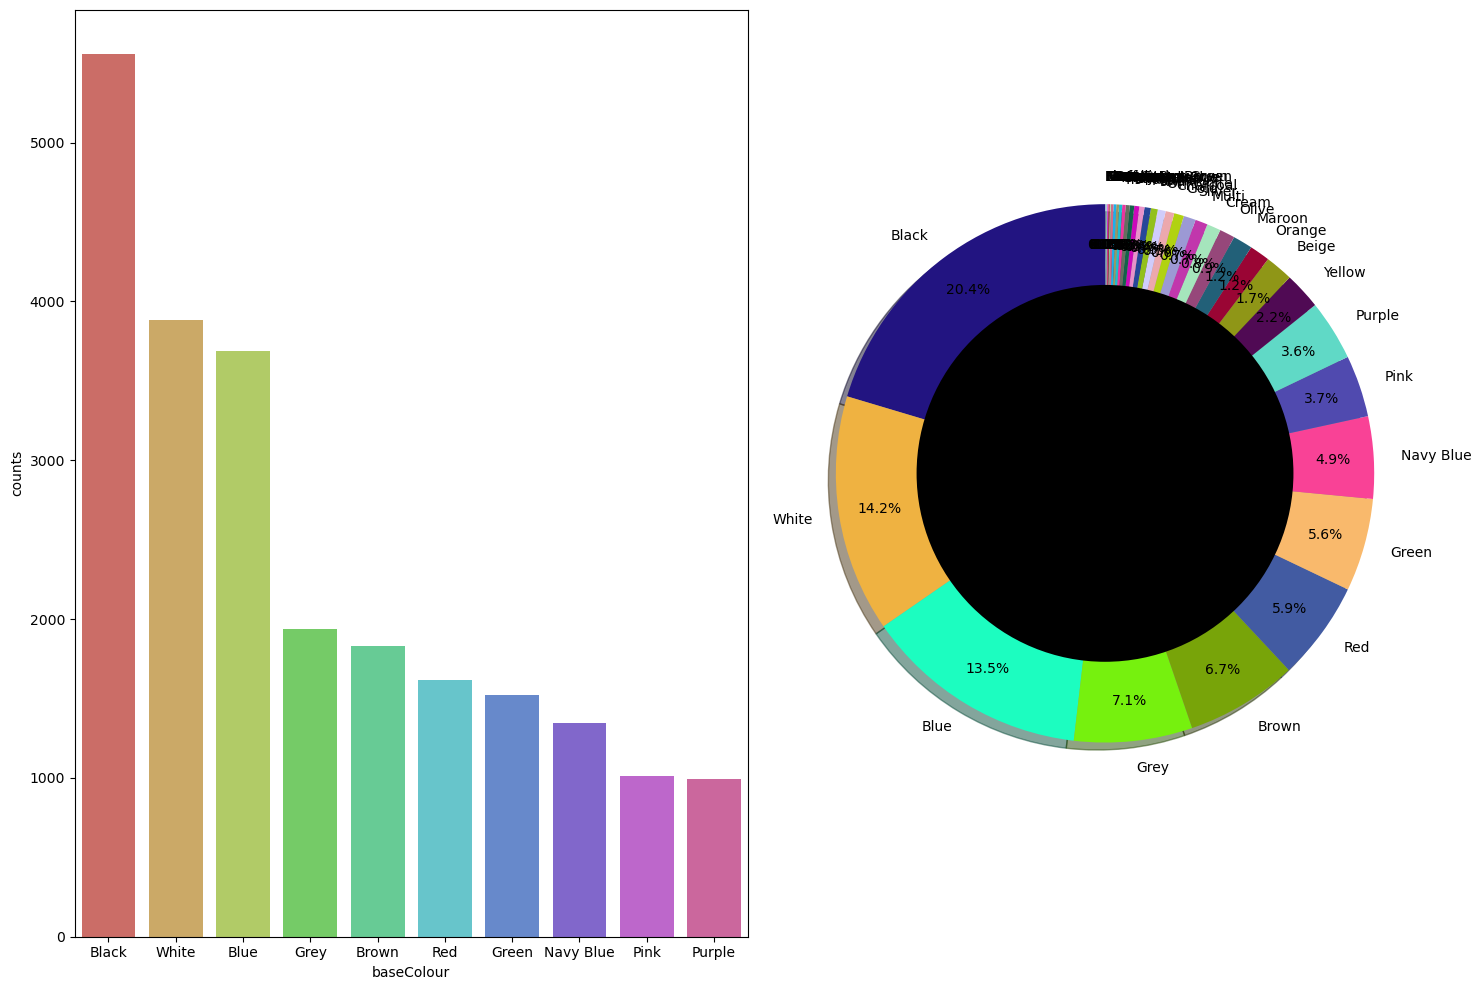

In [5]:
import random
from random import randint
import seaborn as sns
df = styles.copy()
df_colors = df.groupby(["baseColour"]).size().reset_index(name="counts").sort_values(by=["counts"], ascending=False)

colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for n in range(df.baseColour.nunique())] 

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.barplot(x="baseColour", y="counts", data=df_colors.head(10), palette="hls", ax=axes[0])
axes[1].pie(list(df_colors.counts.values), labels=list(df_colors.baseColour.values), autopct="%1.1f%%", shadow=True, startangle=90, pctdistance=0.85,colors=colors)
center_circle = plt.Circle((0, 0), 0.70, fc='black')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.tight_layout()
plt.show()

<Axes: ylabel='baseColour'>

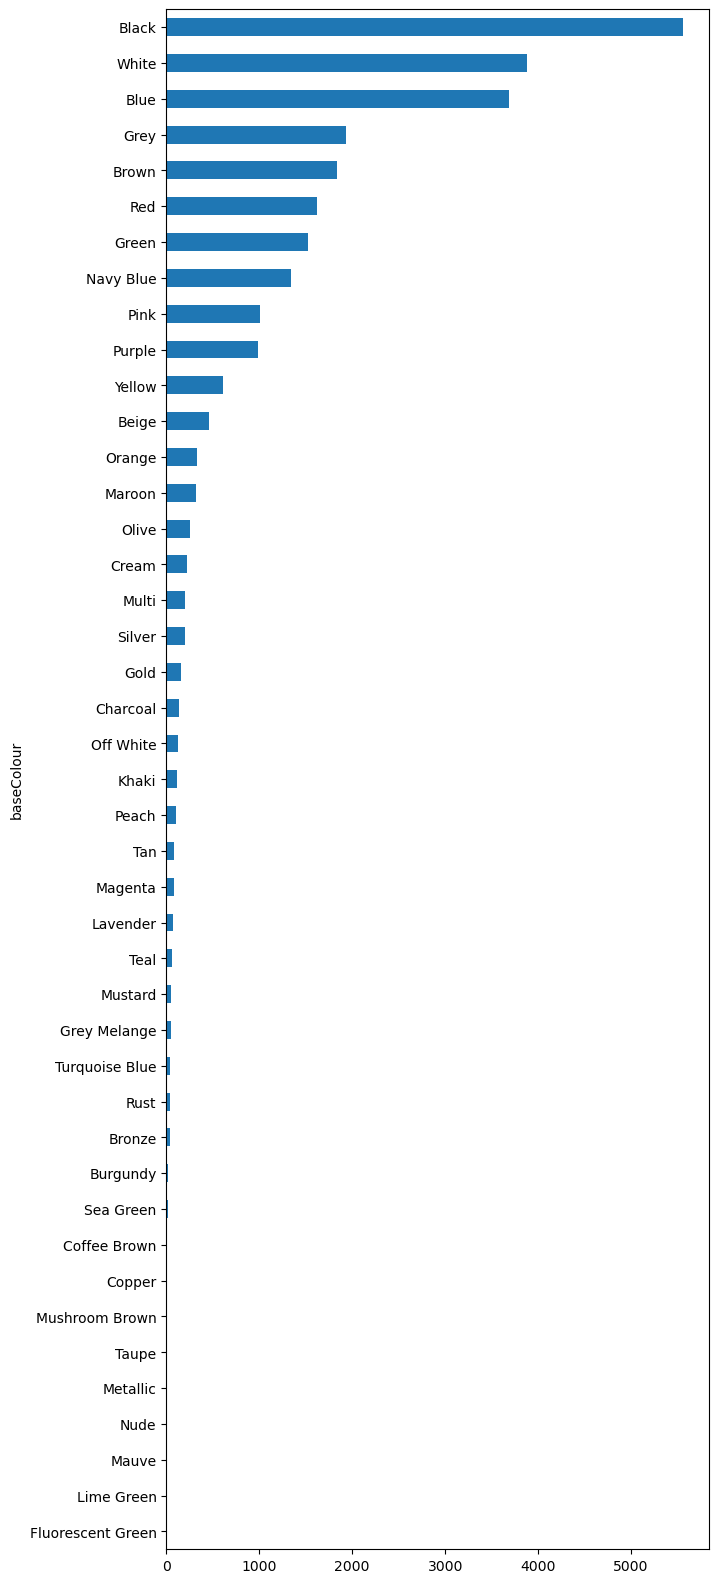

In [6]:
plt.figure(figsize=(7,20))
styles.baseColour.value_counts().sort_values().plot(kind='barh')

In [7]:
# change the original color column
styles.loc[(styles.baseColour=='Red')|
           (styles.baseColour=='Brown')|
           (styles.baseColour=='Coffee Brown')|
           (styles.baseColour=='Maroon')|
           (styles.baseColour=='Rust')|
           (styles.baseColour=='Burgundy')|
           (styles.baseColour=='Mushroom Brown'),"colorgroup"] = "Red"
styles.loc[(styles.baseColour=='Copper'),"colorgroup"] = "Dark Orange"
styles.loc[(styles.baseColour=='Orange')|
           (styles.baseColour=='Bronze')|
           (styles.baseColour=='Skin')|
           (styles.baseColour=='Nude'),"colorgroup"] = "Orange"
styles.loc[(styles.baseColour=='Gold')|
           (styles.baseColour=='Khaki')|
           (styles.baseColour=='Beige')|
           (styles.baseColour=='Mustard')|
           (styles.baseColour=='Tan')|
           (styles.baseColour=='Metallic'),"colorgroup"]= "Dark Yellow"
styles.loc[(styles.baseColour=='Yellow'),"colorgroup"] = "Yellow"
styles.loc[(styles.baseColour=='Lime Green'),"colorgroup"]= "Green"
styles.loc[(styles.baseColour=='Green')|
       (styles.baseColour=='Sea Green')|
       (styles.baseColour=='Fluorescent Green')|
       (styles.baseColour=='Olive'),"colorgroup"] = "Dark Green"
styles.loc[(styles.baseColour=='Teal')|
       (styles.baseColour=='Turquoise Blue'),"colorgroup"] = "Light Blue"
styles.loc[(styles.baseColour=='Blue'),"colorgroup"]= "Blue"
styles.loc[(styles.baseColour=='Navy Blue'),"colorgroup"] = "Dark Blue"
styles.loc[(styles.baseColour=='Purple')|
       (styles.baseColour=='Lavender'),"colorgroup"] = "Purple"
styles.loc[(styles.baseColour=='Pink')|
       (styles.baseColour=='Magenta')|
       (styles.baseColour=='Peach')|
       (styles.baseColour=='Rose')|
       (styles.baseColour=='Mauve'),"colorgroup"] = "Pink"
styles.loc[(styles.baseColour=='Black')|
       (styles.baseColour=='Charcoal'),"colorgroup"] = "Black"
styles.loc[(styles.baseColour=='White')|
       (styles.baseColour=='Off White')|
       (styles.baseColour=='Cream'),"colorgroup"] = "White"
styles.loc[(styles.baseColour=='Grey')|
       (styles.baseColour=='Silver')|
       (styles.baseColour=='Taupe')|
       (styles.baseColour=='Grey Melange'),"colorgroup"] = "Grey"
styles.loc[(styles.baseColour=='Multi'),"colorgroup"] = "Multi"

<Axes: ylabel='articleType'>

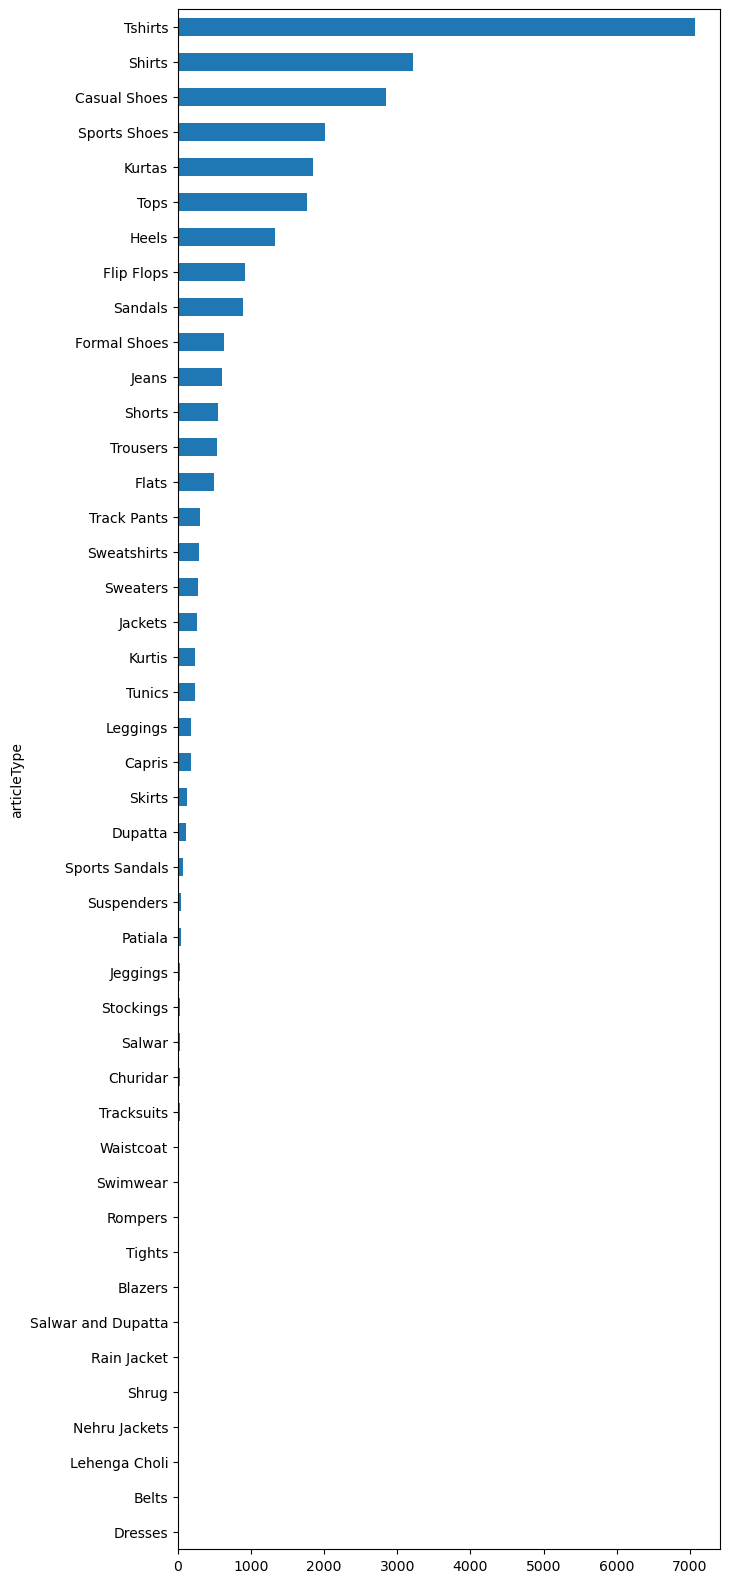

In [8]:
plt.figure(figsize=(7,20))
styles.articleType.value_counts().sort_values().plot(kind='barh')

<Axes: ylabel='gender'>

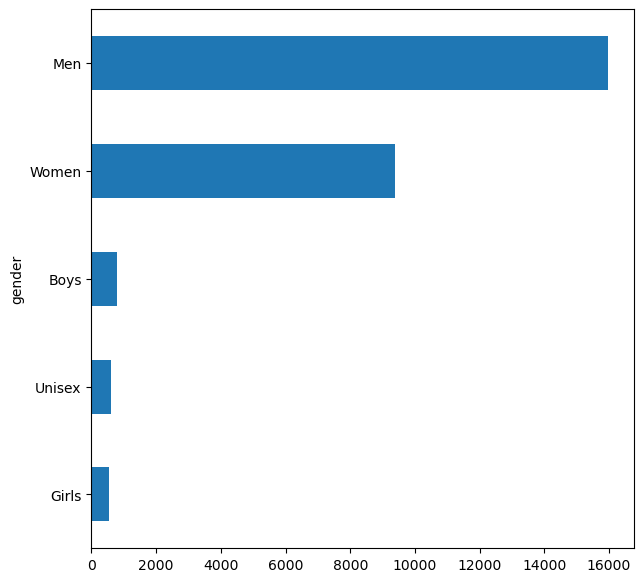

In [9]:
plt.figure(figsize=(7,7))
styles.gender.value_counts().sort_values().plot(kind='barh')